### 決策樹 Decision tree
將特徵已條件判斷的方式決定答案

![image](./img/%E6%B1%BA%E7%AD%96%E6%A8%B9.jpg)

### 決策樹如何生成?
決策樹以貪婪法則來決定每一層要問什麼問題
尋找最有利的特徵可以快速的做分類

![image](./img/%E6%B1%BA%E7%AD%96%E6%A8%B92.jpg)

### 決策樹的混亂評估指標
我們需要客觀的標準來決定決策樹的分支
1. Information gain(資訊獲利)
2. Gain ratio(吉尼獲利)
3. Gini index(吉尼係數) = Gini Impurity(吉尼不純度)

### 評估分割資訊量
透過從訓練資料找出規則，讓每一個決策能夠使訊息增益最大化
1. 資訊獲利(Information Gain)
2. Gini不純度(Gini Impurity)


![image](./img/%E6%B1%BA%E7%AD%96%E6%A8%B93.jpg)

### 熵 (Entropy)

![image](./img/%E6%B1%BA%E7%AD%96%E6%A8%B94.jpg)

### Gini不純度 (Gini Impurity)

![image](./img/%E6%B1%BA%E7%AD%96%E6%A8%B95.jpg)

### 決策樹模型優缺點
優點:
1. 簡單且高度可解釋性
2. 低計算時間複雜度
3. 每個決策階段都相當的明確清楚
4. 幾乎沒有要調整的超參數

缺點:
1. 模型容易過度擬合
2. 當標籤類別種類多時，樹會很複雜

In [5]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

### 一)載入資料集

In [6]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### 二)手動編碼

In [7]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


### 三)檢查缺失值

In [8]:
X = df_train.drop(labels=["variety","Class"],axis=1).values #移除 class,variety(因為字母不參與訓練)
#checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


### 四)切割訓練集與測試集

In [9]:
from sklearn.model_selection import train_test_split
X = df_train.drop(labels=["Class","variety"],axis=1)
y = df_train["Class"]
X_train , X_test ,y_train , y_test = train_test_split(X,y , test_size = .3 , random_state=42)

In [10]:
print("Training data shape : ",X_train.shape)
print("Testing data shape : ", X_test.shape)

Training data shape :  (105, 4)
Testing data shape :  (45, 4)


### 繪製決策邊界Function

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #setup marker generator and color map
    markers = ("s","x","o","^","v")
    colors = ("red","blue","lightgreen","gray","cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min , x1_max = X[:,0].min() - 1 , X[:,0].max() + 1
    x2_min , x2_max = X[:,1].min() - 1 , X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1 , xx2 , Z , alpha=0.4 , cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0] , y=X[y==cl,1],alpha=0.8,c=[cmap(idx)],
        marker=markers[idx],label=cl)
    if test_idx:
        X_test , y_test = X[test_idx,:] , y[test_idx]
        plt.scatter(X_test[:,0] , X_test[:,1] , c="",alpha=1.0,linewidth=1,
        marker="o",s=55,label="test set")


### PCA降維

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,iterated_power=1)
train_reduced = pca.fit_transform(X_train)
test_reduced = pca.transform(X_test)

### 分類決策樹
一個決策樹會根據訓練資料自動產生一棵樹。決策樹會根據資料產生很多樹狀的規則，最終訓練出來的規則會對新樣本進行預測

Parameters:

1. criterion : 亂度的評估標準，gini/entropy。預設為gini
2. max_depth : 樹的最大深度
3. splitter :  特徵劃分點選擇標準，best/random。預設為best
4. random_state : 亂數種子，確保每次訓練結果都一樣，splitter=random才有用
5. min_samples_split : 至少有多少資料才能再分
6. min_samples_leaf : 分完至少有多少資料才能分

Attributes:

feature_importances_ : 查詢模型特徵的重要程度

Methods:
1. fit : 放入X、y進行模型擬合
2. predict : 預測並回傳預測類別
3. score : 預測成功的比例
4. predict_proba : 預測每個類別的機率值
5. get_depth : 取得樹的深度

train set accurancy:  1.0


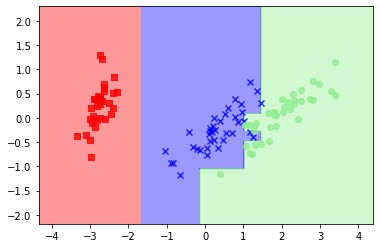

In [13]:
from sklearn.tree import DecisionTreeClassifier

#建立Logistic模型
decisionTreeModel = DecisionTreeClassifier(criterion = "entropy",max_depth=6,random_state=42)
#使用訓練資料訓練模型
decisionTreeModel.fit(train_reduced,y_train)

#使用訓練資料預測分類
predicted = decisionTreeModel.predict(train_reduced)


#訓練集預測
plot_decision_regions(train_reduced,y_train,decisionTreeModel)
print("train set accurancy: ",decisionTreeModel.score(train_reduced,y_train))

test set accurancy:  0.9777777777777777


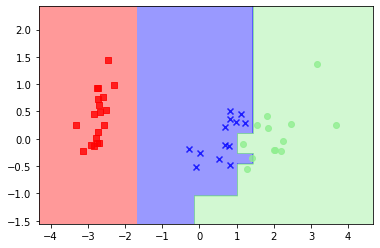

In [14]:
#測試集預測
plot_decision_regions(test_reduced, y_test , decisionTreeModel)
print("test set accurancy: ",decisionTreeModel.score(test_reduced , y_test))

### 視覺化決策樹

Graphvic 是視覺化決策樹的套件

In [15]:
#create model
decisionTreeModel = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)
decisionTreeModel.fit(X_train,y_train)

print("train set accurancy: ",decisionTreeModel.score(X_train,y_train))
print("test set accurancy: ",decisionTreeModel.score(X_test , y_test))

train set accurancy:  0.9523809523809523
test set accurancy:  1.0


In [16]:
print("特徵重要程度: " , decisionTreeModel.feature_importances_)

特徵重要程度:  [0.         0.         0.92510833 0.07489167]


In [25]:
'''
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(decisionTreeModel,out_file=None,
                   feature_names=["sepal.length","sepal.width","petal.length","petal.width"],
                   class_names=["setosa","versicolor","virginica"],
                   filled=True , rounded= True,
                   special_characters= True )
graph = graphviz.Source(dot_data)

graph
'''

'\nfrom sklearn.tree import export_graphviz\nimport graphviz\ndot_data = export_graphviz(decisionTreeModel,out_file=None,\n                   feature_names=["sepal.length","sepal.width","petal.length","petal.width"],\n                   class_names=["setosa","versicolor","virginica"],\n                   filled=True , rounded= True,\n                   special_characters= True )\ngraph = graphviz.Source(dot_data)\n\ngraph\n'